In [227]:
import pandas as pd 
import re
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import collections
from collections import Counter

In [228]:
df=pd.read_csv(r"C:\Users\15145\Documents\text analytics\cleaned_dataset.csv")

In [229]:
df.columns

Index(['title', 'userid'], dtype='object')

In [230]:
#temp = df['comment'].tolist()#converting it to list

In [231]:
#df['comment']=df['comment'].tolist()

In [232]:
df['title']=df['title'].astype('str')

In [233]:
df['Token_Names'] = df.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

In [234]:
#df1 = pd.DataFrame({'sentences': ['This is a very good site. I will recommend it to others.', 'Can you please give me a call at 9983938428. have issues with the listings.', 'good work! keep it up']})
#df1['tokenized_sents'] = df1.apply(lambda row: nltk.word_tokenize(row['sentences']), axis=1)

In [235]:
#df1['sentences']

In [236]:
df

,title,userid,Token_Names
0,i_m not due_to the smell and noise of diesel,libertycat,"[i_m, not, due_to, the, smell, and, noise, of,..."
1,i really think you should take this over to th...,tidester,"[i, really, think, you, should, take, this, ov..."
2,today s diesels common_rail or even the old ve...,jlp8885,"[today, s, diesels, common_rail, or, even, the..."
3,i_suspect it may get the benz e300d power_plan...,dieselbreath,"[i_suspect, it, may, get, the, benz, e300d, po..."
4,it may_be the co_op in volga that is where he_...,gagrice,"[it, may_be, the, co_op, in, volga, that, is, ..."
...,...,...,...
4987,atf_plus 4 is dc tranny_fluid what are they us...,tired_old_dave,"[atf_plus, 4, is, dc, tranny_fluid, what, are,..."
4988,maybe you_re onto_something crack the egg make...,jimhemi,"[maybe, you_re, onto_something, crack, the, eg..."
4989,take it it a detroit_diesel repair_shop dc own...,jimhemi,"[take, it, it, a, detroit_diesel, repair_shop,..."
4990,how would you react if a really good and serio...,caribou1,"[how, would, you, react, if, a, really, good, ..."


In [237]:
def multiple_replace(dict, text):
  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text) 

In [238]:
df1=pd.read_csv(r"C:\Users\15145\Documents\text analytics\models.csv",encoding = 'unicode_escape')

In [239]:
x=df1.set_index('model')['brand'].to_dict()

In [240]:
df['title'] = df.apply(lambda row: multiple_replace(x, row['title']), axis=1)

In [241]:
df['Token_Names']

0       [i_m, not, due_to, the, smell, and, noise, of,...
1       [i, really, think, you, should, take, this, ov...
2       [today, s, diesels, common_rail, or, even, the...
3       [i_suspect, it, may, get, the, benz, e300d, po...
4       [it, may_be, the, co_op, in, volga, that, is, ...
                              ...                        
4987    [atf_plus, 4, is, dc, tranny_fluid, what, are,...
4988    [maybe, you_re, onto_something, crack, the, eg...
4989    [take, it, it, a, detroit_diesel, repair_shop,...
4990    [how, would, you, react, if, a, really, good, ...
4991    [dave, the, level, of, the, fluid, in, the, re...
Name: Token_Names, Length: 4992, dtype: object

In [242]:
#df.to_csv(r'C:\Users\15145\Documents\text analytics\temp.csv')

In [243]:
#df['ujju']=list(map(lambda y: [y.replace(y, x.values()) if x.keys==y else y for key in x.keys() if x.keys==y],df['Token_Names']))

In [244]:
df['Token_Names1']=df['Token_Names'].to_list()

In [245]:
df.head()

,title,userid,Token_Names,Token_Names1
0,i_m not due_to the smell and noise of diesel,libertycat,"[i_m, not, due_to, the, smell, and, noise, of,...","[i_m, not, due_to, the, smell, and, noise, of,..."
1,i really think you should take this over to th...,tidester,"[i, really, think, you, should, take, this, ov...","[i, really, think, you, should, take, this, ov..."
2,today s diesels common_rail or even the old ve...,jlp8885,"[today, s, diesels, common_rail, or, even, the...","[today, s, diesels, common_rail, or, even, the..."
3,i_suspect it may get the mercedes e300d power_...,dieselbreath,"[i_suspect, it, may, get, the, benz, e300d, po...","[i_suspect, it, may, get, the, benz, e300d, po..."
4,it may_be the co_op in volga that is where he_...,gagrice,"[it, may_be, the, co_op, in, volga, that, is, ...","[it, may_be, the, co_op, in, volga, that, is, ..."


In [246]:
df['test']=list(map(lambda y:[sen.replace(sen,x[sen])  for sen in y for key in x.keys() if sen==key  ],df['Token_Names']))

In [247]:
df.head()

,title,userid,Token_Names,Token_Names1,test
0,i_m not due_to the smell and noise of diesel,libertycat,"[i_m, not, due_to, the, smell, and, noise, of,...","[i_m, not, due_to, the, smell, and, noise, of,...",[]
1,i really think you should take this over to th...,tidester,"[i, really, think, you, should, take, this, ov...","[i, really, think, you, should, take, this, ov...",[]
2,today s diesels common_rail or even the old ve...,jlp8885,"[today, s, diesels, common_rail, or, even, the...","[today, s, diesels, common_rail, or, even, the...","[volkswagen, subaru, volkswagen, volkswagen, s..."
3,i_suspect it may get the mercedes e300d power_...,dieselbreath,"[i_suspect, it, may, get, the, benz, e300d, po...","[i_suspect, it, may, get, the, benz, e300d, po...","[mercedes, subaru, subaru]"
4,it may_be the co_op in volga that is where he_...,gagrice,"[it, may_be, the, co_op, in, volga, that, is, ...","[it, may_be, the, co_op, in, volga, that, is, ...",[]


In [248]:
x

{'integra': 'acura',
 'Legend\xa0': 'honda',
 'vigor': 'acura',
 'rlx': 'acura',
 'ILX': 'acura',
 'MDX': 'acura',
 'RDX': 'acura',
 'TSX': 'acura',
 'RSX': 'acura',
 'quattro': 'audi',
 'a4': 'audi',
 'a6': 'audi',
 'a5': 'audi',
 'a7': 'audi',
 'q3': 'audi',
 'q5': 'audi',
 'q7': 'audi',
 'a8': 'audi',
 'a3': 'audi',
 '3-series': 'bmw',
 '5-series': 'bmw',
 '6-series': 'bmw',
 '4-series': 'bmw',
 'xdrive': 'bmw',
 'alpina': 'bmw',
 '330ci': 'bmw',
 '328i': 'bmw',
 '330c': 'bmw',
 '335i': 'bmw',
 '335d': 'bmw',
 '528i': 'bmw',
 '535i': 'bmw',
 '128i': 'bmw',
 '640i': 'bmw',
 '3er': 'bmw',
 '5er': 'bmw',
 'M5': 'bmw',
 'M3': 'bmw',
 'M6': 'bmw',
 'bmws': 'bmw',
 'bmwesque': 'bmw',
 'park avenue': 'buick',
 'la crosse': 'buick',
 'lacrosse': 'buick',
 'century': 'buick',
 'enclave': 'buick',
 'encore': 'buick',
 'regal': 'buick',
 'buicks': 'buick',
 'escalade': 'cadillac',
 'srx': 'cadillac',
 'xts': 'cadillac',
 'Grand Blazer': 'chevrolet',
 'TrailBlazer\xa0': 'chevrolet',
 'trailblaz

In [249]:
#df.to_csv(r'C:\Users\15145\Documents\text analytics\temp.csv')

In [250]:
df['test']

0                                                      []
1                                                      []
2       [volkswagen, subaru, volkswagen, volkswagen, s...
3                              [mercedes, subaru, subaru]
4                                                      []
                              ...                        
4987                                               [ford]
4988                                                   []
4989                                                   []
4990                                                   []
4991                                                   []
Name: test, Length: 4992, dtype: object

In [251]:
df['count']=list(map(lambda y:[Counter(y).keys()],df['test']))

In [252]:
df['count']

0                         [()]
1                         [()]
2       [(volkswagen, subaru)]
3         [(mercedes, subaru)]
4                         [()]
                 ...          
4987                  [(ford)]
4988                      [()]
4989                      [()]
4990                      [()]
4991                      [()]
Name: count, Length: 4992, dtype: object

In [253]:
df

,title,userid,Token_Names,Token_Names1,test,count
0,i_m not due_to the smell and noise of diesel,libertycat,"[i_m, not, due_to, the, smell, and, noise, of,...","[i_m, not, due_to, the, smell, and, noise, of,...",[],[()]
1,i really think you should take this over to th...,tidester,"[i, really, think, you, should, take, this, ov...","[i, really, think, you, should, take, this, ov...",[],[()]
2,today s diesels common_rail or even the old ve...,jlp8885,"[today, s, diesels, common_rail, or, even, the...","[today, s, diesels, common_rail, or, even, the...","[volkswagen, subaru, volkswagen, volkswagen, s...","[(volkswagen, subaru)]"
3,i_suspect it may get the mercedes e300d power_...,dieselbreath,"[i_suspect, it, may, get, the, benz, e300d, po...","[i_suspect, it, may, get, the, benz, e300d, po...","[mercedes, subaru, subaru]","[(mercedes, subaru)]"
4,it may_be the co_op in volga that is where he_...,gagrice,"[it, may_be, the, co_op, in, volga, that, is, ...","[it, may_be, the, co_op, in, volga, that, is, ...",[],[()]
...,...,...,...,...,...,...
4987,atf_plus 4 is dc tranny_fluid what are they us...,tired_old_dave,"[atf_plus, 4, is, dc, tranny_fluid, what, are,...","[atf_plus, 4, is, dc, tranny_fluid, what, are,...",[ford],[(ford)]
4988,maybe you_re onto_something crack the egg make...,jimhemi,"[maybe, you_re, onto_something, crack, the, eg...","[maybe, you_re, onto_something, crack, the, eg...",[],[()]
4989,take it it a detroit_diesel repair_shop dc own...,jimhemi,"[take, it, it, a, detroit_diesel, repair_shop,...","[take, it, it, a, detroit_diesel, repair_shop,...",[],[()]
4990,how would you react if a really good and serio...,caribou1,"[how, would, you, react, if, a, really, good, ...","[how, would, you, react, if, a, really, good, ...",[],[()]


In [254]:
def list_to_tuple(tup):
    result=[]
    for t in tup: 
        for x in t: 
            result.append(x) 
    return result

In [255]:
df['test1']=list(map(lambda y:list_to_tuple(y),df['count']))

In [256]:
df['test1']

0                         []
1                         []
2       [volkswagen, subaru]
3         [mercedes, subaru]
4                         []
                ...         
4987                  [ford]
4988                      []
4989                      []
4990                      []
4991                      []
Name: test1, Length: 4992, dtype: object

In [257]:
df['test_string'] = df['test1'].apply(lambda x: ', '.join([str(i) for i in x]))

In [258]:
df.head()

,title,userid,Token_Names,Token_Names1,test,count,test1,test_string
0,i_m not due_to the smell and noise of diesel,libertycat,"[i_m, not, due_to, the, smell, and, noise, of,...","[i_m, not, due_to, the, smell, and, noise, of,...",[],[()],[],
1,i really think you should take this over to th...,tidester,"[i, really, think, you, should, take, this, ov...","[i, really, think, you, should, take, this, ov...",[],[()],[],
2,today s diesels common_rail or even the old ve...,jlp8885,"[today, s, diesels, common_rail, or, even, the...","[today, s, diesels, common_rail, or, even, the...","[volkswagen, subaru, volkswagen, volkswagen, s...","[(volkswagen, subaru)]","[volkswagen, subaru]","volkswagen, subaru"
3,i_suspect it may get the mercedes e300d power_...,dieselbreath,"[i_suspect, it, may, get, the, benz, e300d, po...","[i_suspect, it, may, get, the, benz, e300d, po...","[mercedes, subaru, subaru]","[(mercedes, subaru)]","[mercedes, subaru]","mercedes, subaru"
4,it may_be the co_op in volga that is where he_...,gagrice,"[it, may_be, the, co_op, in, volga, that, is, ...","[it, may_be, the, co_op, in, volga, that, is, ...",[],[()],[],


In [259]:
temp = df['test_string'].tolist()#converting it to list

In [260]:
temp=' '.join(temp).split()

In [261]:
temp

['volkswagen,',
 'subaru',
 'mercedes,',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'subaru,',
 'volkswagen',
 'subaru',
 'subaru',
 'subaru',
 'subaru,',
 'volkswagen',
 'toyota',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'subaru,',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen,',
 'subaru',
 'volkswagen,',
 'subaru',
 'volkswagen',
 'chevrolet',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'subaru',
 'volkswagen',
 'subaru',
 'volkswagen',
 'audi',
 'dodge',
 'subaru',
 'subaru,',
 'volkswagen',
 'subaru',
 'subaru',
 'chrysler',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'pontiac,',
 'ford',
 'subaru,',
 'dodge,',
 'ford',
 'subaru',
 'subaru',
 'chevrolet,',
 'subaru',
 'dodge',
 'subaru',
 'subaru',
 'volkswagen,',
 'subaru',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'subaru',
 'volkswagen,',
 'subaru',
 'volkswagen',
 'volkswagen,',
 'chevrolet',


In [262]:
token_texts = list(map(word_tokenize, temp))

In [263]:
token_texts

[['volkswagen', ','],
 ['subaru'],
 ['mercedes', ','],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['volkswagen'],
 ['subaru', ','],
 ['volkswagen'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru', ','],
 ['volkswagen'],
 ['toyota'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['volkswagen'],
 ['subaru', ','],
 ['volkswagen'],
 ['volkswagen'],
 ['volkswagen'],
 ['volkswagen', ','],
 ['subaru'],
 ['volkswagen', ','],
 ['subaru'],
 ['volkswagen'],
 ['chevrolet'],
 ['volkswagen'],
 ['volkswagen'],
 ['volkswagen'],
 ['subaru'],
 ['volkswagen'],
 ['subaru'],
 ['volkswagen'],
 ['audi'],
 ['dodge'],
 ['subaru'],
 ['subaru', ','],
 ['volkswagen'],
 ['subaru'],
 ['subaru'],
 ['chrysler'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['subaru'],
 ['volkswagen'],
 ['pontiac', ','],
 ['ford'],
 ['subaru', ','],
 ['dodge', ','],
 ['ford'],
 ['subaru'],
 ['subaru'],
 ['chevrolet', ','],
 ['subaru'],
 ['dodg

In [264]:
flattened = []#converting list of list to list
for sublist in token_texts:
    for val in sublist:
        flattened.append(val)

In [265]:
flattened

['volkswagen',
 ',',
 'subaru',
 'mercedes',
 ',',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'subaru',
 ',',
 'volkswagen',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 ',',
 'volkswagen',
 'toyota',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'subaru',
 ',',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 ',',
 'subaru',
 'volkswagen',
 ',',
 'subaru',
 'volkswagen',
 'chevrolet',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'subaru',
 'volkswagen',
 'subaru',
 'volkswagen',
 'audi',
 'dodge',
 'subaru',
 'subaru',
 ',',
 'volkswagen',
 'subaru',
 'subaru',
 'chrysler',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'pontiac',
 ',',
 'ford',
 'subaru',
 ',',
 'dodge',
 ',',
 'ford',
 'subaru',
 'subaru',
 'chevrolet',
 ',',
 'subaru',
 'dodge',
 'subaru',
 'subaru',
 'volkswagen',
 ',',
 'subaru',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'subaru',
 'volks

In [266]:
stop_words=set(stopwords.words('english'))#getting stopwords

In [267]:
filtered=[]#list of tokens without stop words

In [268]:
for w in flattened:
       if w not in stop_words:
            filtered.append(w)

In [269]:
filtered

['volkswagen',
 ',',
 'subaru',
 'mercedes',
 ',',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'subaru',
 ',',
 'volkswagen',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 ',',
 'volkswagen',
 'toyota',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'subaru',
 ',',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 ',',
 'subaru',
 'volkswagen',
 ',',
 'subaru',
 'volkswagen',
 'chevrolet',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'subaru',
 'volkswagen',
 'subaru',
 'volkswagen',
 'audi',
 'dodge',
 'subaru',
 'subaru',
 ',',
 'volkswagen',
 'subaru',
 'subaru',
 'chrysler',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'pontiac',
 ',',
 'ford',
 'subaru',
 ',',
 'dodge',
 ',',
 'ford',
 'subaru',
 'subaru',
 'chevrolet',
 ',',
 'subaru',
 'dodge',
 'subaru',
 'subaru',
 'volkswagen',
 ',',
 'subaru',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'subaru',
 'volks

In [270]:
y=filtered.remove(',')

In [271]:
print(y)

None


In [272]:
while(',' in filtered) : 
    filtered.remove(',') 

In [273]:
print(filtered)

['volkswagen', 'subaru', 'mercedes', 'subaru', 'subaru', 'subaru', 'subaru', 'subaru', 'subaru', 'subaru', 'volkswagen', 'subaru', 'volkswagen', 'subaru', 'subaru', 'subaru', 'subaru', 'volkswagen', 'toyota', 'subaru', 'subaru', 'subaru', 'subaru', 'subaru', 'volkswagen', 'subaru', 'volkswagen', 'volkswagen', 'volkswagen', 'volkswagen', 'subaru', 'volkswagen', 'subaru', 'volkswagen', 'chevrolet', 'volkswagen', 'volkswagen', 'volkswagen', 'subaru', 'volkswagen', 'subaru', 'volkswagen', 'audi', 'dodge', 'subaru', 'subaru', 'volkswagen', 'subaru', 'subaru', 'chrysler', 'subaru', 'subaru', 'subaru', 'subaru', 'subaru', 'subaru', 'volkswagen', 'pontiac', 'ford', 'subaru', 'dodge', 'ford', 'subaru', 'subaru', 'chevrolet', 'subaru', 'dodge', 'subaru', 'subaru', 'volkswagen', 'subaru', 'volkswagen', 'volkswagen', 'volkswagen', 'subaru', 'volkswagen', 'subaru', 'volkswagen', 'volkswagen', 'chevrolet', 'volkswagen', 'subaru', 'mercedes', 'volkswagen', 'mercedes', 'mercedes', 'subaru', 'subaru', 

In [274]:
counter1=collections.Counter(filtered)
print(counter1)

Counter({'subaru': 594, 'volkswagen': 127, 'chevrolet': 53, 'mercedes': 51, 'dodge': 40, 'toyota': 24, 'ford': 23, 'honda': 18, 'nissan': 17, 'chrysler': 10, 'audi': 7, 'kia': 7, 'hyundai': 6, 'pontiac': 3, 'bmw': 2, 'buick': 2, 'cadillac': 2})


In [275]:
import operator

In [276]:
sorted_d1 = dict( sorted(counter1.items(), key=operator.itemgetter(1),reverse=True))

In [277]:
sorted_d1

{'subaru': 594,
 'volkswagen': 127,
 'chevrolet': 53,
 'mercedes': 51,
 'dodge': 40,
 'toyota': 24,
 'ford': 23,
 'honda': 18,
 'nissan': 17,
 'chrysler': 10,
 'audi': 7,
 'kia': 7,
 'hyundai': 6,
 'pontiac': 3,
 'bmw': 2,
 'buick': 2,
 'cadillac': 2}

In [278]:
import itertools 

In [279]:
out = dict(itertools.islice(sorted_d1.items(), 10))          
# printing result top 5
print("Dictionary limited by K is : " + str(out))  

Dictionary limited by K is : {'subaru': 594, 'volkswagen': 127, 'chevrolet': 53, 'mercedes': 51, 'dodge': 40, 'toyota': 24, 'ford': 23, 'honda': 18, 'nissan': 17, 'chrysler': 10}


#part c

In [280]:
df2=pd.read_csv(r'C:\Users\15145\Documents\text analytics\attributes.csv',encoding = 'unicode_escape')

In [281]:
y=df2.set_index('feature')['attribute'].to_dict()

In [282]:
y

{'brand': 'brand_image',
 'cheap': 'brand_image',
 'country of origin': 'brand_image',
 'exclusive': 'brand_image',
 'expensive': 'brand_image',
 'good value': 'brand_image',
 'image': 'brand_image',
 'logo': 'brand_image',
 'well priced': 'brand_image',
 'build': 'build_quality',
 'built': 'build_quality',
 'firm': 'build_quality',
 'firmness': 'build_quality',
 'material': 'build_quality',
 'noises': 'build_quality',
 'panels ': 'build_quality',
 'smell': 'build_quality',
 'weird noises': 'build_quality',
 'ac ': 'comfort',
 'adjustable': 'comfort',
 'air conditioned': 'comfort',
 'comfort': 'comfort',
 'driver seat': 'comfort',
 "driver's seat": 'comfort',
 'electric mirrors': 'comfort',
 'front room': 'comfort',
 'head room': 'comfort',
 'heat': 'comfort',
 'heating system': 'comfort',
 'interior  ': 'comfort',
 'interior feel': 'comfort',
 'interior quietness': 'comfort',
 'rear room': 'comfort',
 'room': 'comfort',
 'screen': 'comfort',
 'screen resolution': 'comfort',
 'seat hea

In [283]:
df['test_2']=list(map(lambda i:[sen.replace(sen,y[sen])  for sen in i for key in y.keys() if sen==key  ],df['Token_Names']))

In [284]:
df['test_2']

0             [build_quality, environmental_friendliness]
1                                                      []
2                                                      []
3       [environmental_friendliness, environmental_fri...
4       [environmental_friendliness, environmental_fri...
                              ...                        
4987                                                   []
4988                                                   []
4989                                                   []
4990                                                   []
4991                                        [reliability]
Name: test_2, Length: 4992, dtype: object

In [285]:
df

,title,userid,Token_Names,Token_Names1,test,count,test1,test_string,test_2
0,i_m not due_to the smell and noise of diesel,libertycat,"[i_m, not, due_to, the, smell, and, noise, of,...","[i_m, not, due_to, the, smell, and, noise, of,...",[],[()],[],,"[build_quality, environmental_friendliness]"
1,i really think you should take this over to th...,tidester,"[i, really, think, you, should, take, this, ov...","[i, really, think, you, should, take, this, ov...",[],[()],[],,[]
2,today s diesels common_rail or even the old ve...,jlp8885,"[today, s, diesels, common_rail, or, even, the...","[today, s, diesels, common_rail, or, even, the...","[volkswagen, subaru, volkswagen, volkswagen, s...","[(volkswagen, subaru)]","[volkswagen, subaru]","volkswagen, subaru",[]
3,i_suspect it may get the mercedes e300d power_...,dieselbreath,"[i_suspect, it, may, get, the, benz, e300d, po...","[i_suspect, it, may, get, the, benz, e300d, po...","[mercedes, subaru, subaru]","[(mercedes, subaru)]","[mercedes, subaru]","mercedes, subaru","[environmental_friendliness, environmental_fri..."
4,it may_be the co_op in volga that is where he_...,gagrice,"[it, may_be, the, co_op, in, volga, that, is, ...","[it, may_be, the, co_op, in, volga, that, is, ...",[],[()],[],,"[environmental_friendliness, environmental_fri..."
...,...,...,...,...,...,...,...,...,...
4987,atf_plus 4 is dc tranny_fluid what are they us...,tired_old_dave,"[atf_plus, 4, is, dc, tranny_fluid, what, are,...","[atf_plus, 4, is, dc, tranny_fluid, what, are,...",[ford],[(ford)],[ford],ford,[]
4988,maybe you_re onto_something crack the egg make...,jimhemi,"[maybe, you_re, onto_something, crack, the, eg...","[maybe, you_re, onto_something, crack, the, eg...",[],[()],[],,[]
4989,take it it a detroit_diesel repair_shop dc own...,jimhemi,"[take, it, it, a, detroit_diesel, repair_shop,...","[take, it, it, a, detroit_diesel, repair_shop,...",[],[()],[],,[]
4990,how would you react if a really good and serio...,caribou1,"[how, would, you, react, if, a, really, good, ...","[how, would, you, react, if, a, really, good, ...",[],[()],[],,[]


In [286]:
df['count_feature']=list(map(lambda y:[Counter(y).keys()],df['test_2']))

In [287]:
df['count_feature']

0        [(build_quality, environmental_friendliness)]
1                                                 [()]
2                                                 [()]
3       [(environmental_friendliness, cost_ownership)]
4                       [(environmental_friendliness)]
                             ...                      
4987                                              [()]
4988                                              [()]
4989                                              [()]
4990                                              [()]
4991                                   [(reliability)]
Name: count_feature, Length: 4992, dtype: object

In [288]:
df['test_3']=list(map(lambda y:list_to_tuple(y),df['count_feature']))

In [289]:
df['test_3_features'] = df['test_3'].apply(lambda x: ', '.join([str(i) for i in x]))

In [290]:
temp_1 = df['test_3_features'].tolist()#converting it to list

In [291]:
temp_1

['build_quality, environmental_friendliness',
 '',
 '',
 'environmental_friendliness, cost_ownership',
 'environmental_friendliness',
 'build_quality, environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness, performance',
 'environmental_friendliness, performance',
 'environmental_friendliness',
 '',
 'environmental_friendliness',
 '',
 '',
 'environmental_friendliness',
 '',
 'performance',
 'environmental_friendliness',
 '',
 'environmental_friendliness',
 'performance, environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership, environmental_friendliness',
 'environmental_friendliness',
 '',
 'design, environmental_friendliness, human_machine_interface',
 '',
 'environmental_friendliness',
 'cost_ownership',
 '',
 '',
 '',
 'cost_ownership, performance',
 'environmental_friendliness, cost_ownership, build_quality',
 'envir

In [292]:
temp_1=' '.join(temp_1).split()

In [293]:
temp_1

['build_quality,',
 'environmental_friendliness',
 'environmental_friendliness,',
 'cost_ownership',
 'environmental_friendliness',
 'build_quality,',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness,',
 'performance',
 'environmental_friendliness,',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance,',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership,',
 'environmental_friendliness',
 'environmental_friendliness',
 'design,',
 'environmental_friendliness,',
 'human_machine_interface',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership,',
 'performance',
 'environmental_friendliness,',
 'cost_ownership,',
 'build_quality',
 'environmental_fri

In [294]:
token_texts_features = list(map(word_tokenize, temp_1))

In [295]:
token_texts_features

[['build_quality', ','],
 ['environmental_friendliness'],
 ['environmental_friendliness', ','],
 ['cost_ownership'],
 ['environmental_friendliness'],
 ['build_quality', ','],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['environmental_friendliness', ','],
 ['performance'],
 ['environmental_friendliness', ','],
 ['performance'],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['performance'],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['performance', ','],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['cost_ownership'],
 ['cost_ownership', ','],
 ['environmental_friendliness'],
 ['environmental_friendliness'],
 ['design', ','],
 ['environmental_friendliness', ','],
 ['human_machine_interface'],
 ['environmental_friendliness'],
 ['cost_ownership'],
 ['cost_ownership', ','

In [296]:
flattened = []#converting list of list to list
for sublist in token_texts_features:
    for val in sublist:
        flattened.append(val)

In [297]:
flattened

['build_quality',
 ',',
 'environmental_friendliness',
 'environmental_friendliness',
 ',',
 'cost_ownership',
 'environmental_friendliness',
 'build_quality',
 ',',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 ',',
 'performance',
 'environmental_friendliness',
 ',',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance',
 ',',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership',
 ',',
 'environmental_friendliness',
 'environmental_friendliness',
 'design',
 ',',
 'environmental_friendliness',
 ',',
 'human_machine_interface',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership',
 ',',
 'performance',
 'environmental_friendliness',
 ',',
 '

In [298]:
filtered=[]#list of tokens without stop words

In [299]:
for w in flattened:
       if w not in stop_words:
            filtered.append(w)

In [300]:
filtered

['build_quality',
 ',',
 'environmental_friendliness',
 'environmental_friendliness',
 ',',
 'cost_ownership',
 'environmental_friendliness',
 'build_quality',
 ',',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 ',',
 'performance',
 'environmental_friendliness',
 ',',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance',
 ',',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership',
 ',',
 'environmental_friendliness',
 'environmental_friendliness',
 'design',
 ',',
 'environmental_friendliness',
 ',',
 'human_machine_interface',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership',
 ',',
 'performance',
 'environmental_friendliness',
 ',',
 '

In [301]:
while(',' in filtered) : 
    filtered.remove(',') 

In [302]:
filtered

['build_quality',
 'environmental_friendliness',
 'environmental_friendliness',
 'cost_ownership',
 'environmental_friendliness',
 'build_quality',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance',
 'environmental_friendliness',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'performance',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership',
 'environmental_friendliness',
 'environmental_friendliness',
 'design',
 'environmental_friendliness',
 'human_machine_interface',
 'environmental_friendliness',
 'cost_ownership',
 'cost_ownership',
 'performance',
 'environmental_friendliness',
 'cost_ownership',
 'build_quality',
 'environmental_friendliness',


In [371]:
counter=collections.Counter(filtered)
print(counter)

Counter({'environmental_friendliness': 1238, 'cost_ownership': 860, 'performance': 733, 'reliability': 385, 'human_machine_interface': 234, 'build_quality': 230, 'comfort': 153, 'brand_image': 122, 'design': 114, 'practicality': 81, 'safety': 37, 'security': 27})


In [372]:
sorted_d = dict( sorted(counter.items(), key=operator.itemgetter(1),reverse=True))

In [373]:
out1 = dict(itertools.islice(sorted_d.items(), 5))          
# printing result top 5
print("Dictionary limited by K is : " + str(out1)) 

Dictionary limited by K is : {'environmental_friendliness': 1238, 'cost_ownership': 860, 'performance': 733, 'reliability': 385, 'human_machine_interface': 234}


In [306]:
#lift calculation


In [307]:
def frequency_count(brand1,brand2,comments):
    total_occurences = 0
    for comment in comments:
        if brand1 in comment and brand2 in comment:
            total_occurences += 1
    return total_occurences

In [308]:
def lift_value(fre1,fre2,total_occurences):
    return(5000*(total_occurences/(fre1*fre2)))

In [309]:
#lift_cal = lift_value()/frequency_count()
df.columns

Index(['title', 'userid', 'Token_Names', 'Token_Names1', 'test', 'count',
       'test1', 'test_string', 'test_2', 'count_feature', 'test_3',
       'test_3_features'],
      dtype='object')

In [310]:

df.head()

,title,userid,Token_Names,Token_Names1,test,count,test1,test_string,test_2,count_feature,test_3,test_3_features
0,i_m not due_to the smell and noise of diesel,libertycat,"[i_m, not, due_to, the, smell, and, noise, of,...","[i_m, not, due_to, the, smell, and, noise, of,...",[],[()],[],,"[build_quality, environmental_friendliness]","[(build_quality, environmental_friendliness)]","[build_quality, environmental_friendliness]","build_quality, environmental_friendliness"
1,i really think you should take this over to th...,tidester,"[i, really, think, you, should, take, this, ov...","[i, really, think, you, should, take, this, ov...",[],[()],[],,[],[()],[],
2,today s diesels common_rail or even the old ve...,jlp8885,"[today, s, diesels, common_rail, or, even, the...","[today, s, diesels, common_rail, or, even, the...","[volkswagen, subaru, volkswagen, volkswagen, s...","[(volkswagen, subaru)]","[volkswagen, subaru]","volkswagen, subaru",[],[()],[],
3,i_suspect it may get the mercedes e300d power_...,dieselbreath,"[i_suspect, it, may, get, the, benz, e300d, po...","[i_suspect, it, may, get, the, benz, e300d, po...","[mercedes, subaru, subaru]","[(mercedes, subaru)]","[mercedes, subaru]","mercedes, subaru","[environmental_friendliness, environmental_fri...","[(environmental_friendliness, cost_ownership)]","[environmental_friendliness, cost_ownership]","environmental_friendliness, cost_ownership"
4,it may_be the co_op in volga that is where he_...,gagrice,"[it, may_be, the, co_op, in, volga, that, is, ...","[it, may_be, the, co_op, in, volga, that, is, ...",[],[()],[],,"[environmental_friendliness, environmental_fri...",[(environmental_friendliness)],[environmental_friendliness],environmental_friendliness


In [311]:
for i in counter1.keys():
    for j in counter1.keys():
        if i != j:
            print(frequency_count(i,j,df['test_string']))        

35
2
3
4
1
0
0
0
0
0
0
0
1
0
0
1
35
11
7
15
3
12
3
0
5
1
3
3
5
2
1
2
2
11
4
1
0
1
0
0
0
0
0
0
0
0
0
0
3
7
4
1
1
0
0
0
1
0
0
0
1
0
0
0
4
15
1
1
0
2
0
0
5
0
0
1
1
1
0
1
1
3
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
12
1
0
2
0
0
0
2
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
5
0
1
5
0
2
0
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
5
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0


In [312]:
dict_emp= {}

In [313]:
list_brand_1 = []
list_brand_2 = []
frequency_count1=[]

In [314]:
for i in out.keys():
    for j in out.keys():
        if i != j:
            #frequency_count(i,j,df['test_string'])
            #dict_emp.values() = frequency_count(i,j,df['test_string'])
            #dict_emp.update({i+j:frequency_count(i,j,df['test_string'])})
            x=str(i)
            y=str(j)
            list_brand_1.append(x)
            list_brand_2.append(y)
            frequency_count1.append(frequency_count(i,j,df['test_string']))           

In [315]:
out.values()

dict_values([594, 127, 53, 51, 40, 24, 23, 18, 17, 10])

In [316]:
list_brand_1

['subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'subaru',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'volkswagen',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'mercedes',
 'mercedes',
 'mercedes',
 'mercedes',
 'mercedes',
 'mercedes',
 'mercedes',
 'mercedes',
 'mercedes',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'toyota',
 'toyota',
 'toyota',
 'toyota',
 'toyota',
 'toyota',
 'toyota',
 'toyota',
 'toyota',
 'ford',
 'ford',
 'ford',
 'ford',
 'ford',
 'ford',
 'ford',
 'ford',
 'ford',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'nissan',
 'nissan',
 'nissan',
 'nissan',
 'nissan',
 'nissan',
 'nissan',
 'nissan',
 'nissan',
 'chrysler',
 'chrysler',
 'chrysler',
 'chrysler',
 'chrysler',

In [317]:
y=pd.DataFrame(list(zip(list_brand_1, list_brand_2, frequency_count1)),
              columns=['brand1','brand2', 'frequency'])

In [318]:
y

,brand1,brand2,frequency
0,subaru,volkswagen,35
1,subaru,chevrolet,15
2,subaru,mercedes,11
3,subaru,dodge,12
4,subaru,toyota,7
...,...,...,...
85,chrysler,dodge,0
86,chrysler,toyota,0
87,chrysler,ford,0
88,chrysler,honda,0


In [319]:
#output = pd.DataFrame()
#output = output.append(y, ignore_index=True)
#print(output.head())

#new_dataframe = pd.DataFrame.from_dict(y,orient='index')

In [320]:
#new_dataframe

In [321]:
cleaned_final_df= y.loc[~(y=='frequency').all(axis=1)]

In [322]:
cleaned_final_df

,brand1,brand2,frequency
0,subaru,volkswagen,35
1,subaru,chevrolet,15
2,subaru,mercedes,11
3,subaru,dodge,12
4,subaru,toyota,7
...,...,...,...
85,chrysler,dodge,0
86,chrysler,toyota,0
87,chrysler,ford,0
88,chrysler,honda,0


In [323]:
x=list(out.values())

In [347]:
lift_v1=[]
b1=[]
b2=[]

In [348]:
k=0

In [349]:
print(b1)

[]


In [350]:
temp=list(cleaned_final_df['frequency'])
len(temp)

90

In [351]:
for i in out.values():
    for j in out.values():
        b1.append(list(out.keys())[list(out.values()).index(i)])
        b2.append(list(out.keys())[list(out.values()).index(j)])
        lift_v1.append(lift_value(i,j,temp[k]))
        k=k+1

IndexError: list index out of range

In [339]:
for i in out.values():
    for j in out.values():
        if i!=j:
            b1.append(list(out.keys())[list(out.values()).index(i)])
            b2.append(list(out.keys())[list(out.values()).index(j)])
            lift_v1.append(lift_value(i,j,temp[k]))
            k=k+1

In [340]:
lift_df=pd.DataFrame(list(zip(b1, b2, lift_v1)),
              columns=['brand1','brand2', 'frequency'])

In [341]:
#C
lift_df.sort_values('frequency',ascending=False)

,brand1,brand2,frequency
89,chrysler,nissan,29.411765
80,nissan,chrysler,29.411765
56,ford,chevrolet,20.508614
23,chevrolet,ford,20.508614
48,toyota,mercedes,16.339869
31,mercedes,toyota,16.339869
52,toyota,nissan,12.254902
77,nissan,toyota,12.254902
69,honda,ford,12.077295
60,ford,honda,12.077295


In [342]:
lift_df.to_csv(r'C:\Users\15145\Documents\text analytics\lift_df_.1.csv')

In [345]:
lift_df1=pd.read_csv(r'C:\Users\15145\Documents\text analytics\lift_df.csv')

In [352]:
temp_matrix=lift_df1.pivot('brand1','brand2','frequency')

In [353]:
temp_matrix=np.array(temp_matrix)

In [355]:
temp_matrix_1=np.nan_to_num(temp_matrix)  

In [356]:
temp_matrix_1

array([[ 0.        ,  4.71698113, 20.50861362,  5.24109015,  2.00722601,
         5.89622642,  2.3823137 ,  3.93081761,  3.17107975,  6.73854447],
       [ 4.71698113,  0.        , 10.86956522,  0.        ,  2.65957447,
         0.        ,  2.52525253,  0.        ,  0.        ,  0.        ],
       [20.50861362, 10.86956522,  0.        , 12.07729469,  0.        ,
         0.        ,  1.82989313,  9.05797101,  0.        ,  0.        ],
       [ 5.24109015,  0.        , 12.07729469,  0.        ,  0.        ,
         0.        ,  1.40291807,  0.        ,  0.        ,  0.        ],
       [ 2.00722601,  2.65957447,  0.        ,  0.        ,  0.        ,
         0.        ,  1.61186331, 13.29787234,  0.89397461,  7.59878419],
       [ 5.89622642,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.1043771 , 13.02083333,  0.        ,  0.        ],
       [ 2.3823137 ,  2.52525253,  1.82989313,  1.40291807,  1.61186331,
         2.1043771 ,  0.        ,  2.45510662

In [358]:
from sklearn.manifold import MDS

In [360]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(temp_matrix_1)

coords = results.embedding_ 

In [361]:
coords

array([[-0.73116902,  4.81369215],
       [-0.96482299,  0.79291049],
       [ 2.35781273, -4.84333672],
       [-0.71664735,  0.58867364],
       [ 0.56358183, -1.12249538],
       [ 1.09485973, -1.72217842],
       [ 0.72107818, -0.05452852],
       [-5.32501658,  5.12999491],
       [-1.54119303,  0.68780686],
       [ 4.54151648, -4.27053901]])

In [362]:
import matplotlib.pyplot, pylab

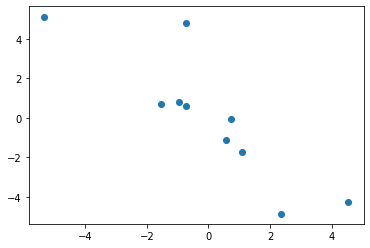

In [363]:
matplotlib.pyplot.scatter(*zip(*coords)) 
matplotlib.pyplot.show()

In [364]:
df["new_column"] = df["test_string"].map(str) +","+ df["test_3_features"]


In [365]:
df.head()

,title,userid,Token_Names,Token_Names1,test,count,test1,test_string,test_2,count_feature,test_3,test_3_features,new_column
0,i_m not due_to the smell and noise of diesel,libertycat,"[i_m, not, due_to, the, smell, and, noise, of,...","[i_m, not, due_to, the, smell, and, noise, of,...",[],[()],[],,"[build_quality, environmental_friendliness]","[(build_quality, environmental_friendliness)]","[build_quality, environmental_friendliness]","build_quality, environmental_friendliness",",build_quality, environmental_friendliness"
1,i really think you should take this over to th...,tidester,"[i, really, think, you, should, take, this, ov...","[i, really, think, you, should, take, this, ov...",[],[()],[],,[],[()],[],,","
2,today s diesels common_rail or even the old ve...,jlp8885,"[today, s, diesels, common_rail, or, even, the...","[today, s, diesels, common_rail, or, even, the...","[volkswagen, subaru, volkswagen, volkswagen, s...","[(volkswagen, subaru)]","[volkswagen, subaru]","volkswagen, subaru",[],[()],[],,"volkswagen, subaru,"
3,i_suspect it may get the mercedes e300d power_...,dieselbreath,"[i_suspect, it, may, get, the, benz, e300d, po...","[i_suspect, it, may, get, the, benz, e300d, po...","[mercedes, subaru, subaru]","[(mercedes, subaru)]","[mercedes, subaru]","mercedes, subaru","[environmental_friendliness, environmental_fri...","[(environmental_friendliness, cost_ownership)]","[environmental_friendliness, cost_ownership]","environmental_friendliness, cost_ownership","mercedes, subaru,environmental_friendliness, c..."
4,it may_be the co_op in volga that is where he_...,gagrice,"[it, may_be, the, co_op, in, volga, that, is, ...","[it, may_be, the, co_op, in, volga, that, is, ...",[],[()],[],,"[environmental_friendliness, environmental_fri...",[(environmental_friendliness)],[environmental_friendliness],environmental_friendliness,",environmental_friendliness"


In [369]:
sorted_d1 = dict( sorted(counter1.items(), key=operator.itemgetter(1),reverse=True))

In [370]:
out = dict(itertools.islice(sorted_d1.items(), 5))          
# printing result top 5
print("Dictionary limited by K is : " + str(out))  

Dictionary limited by K is : {'subaru': 594, 'volkswagen': 127, 'chevrolet': 53, 'mercedes': 51, 'dodge': 40}


In [374]:
out1 = dict(itertools.islice(sorted_d.items(), 5))          
# printing result top 5
print("Dictionary limited by K is : " + str(out1)) 

Dictionary limited by K is : {'environmental_friendliness': 1238, 'cost_ownership': 860, 'performance': 733, 'reliability': 385, 'human_machine_interface': 234}


In [375]:
list_1_c = []
list_2_c = []

In [376]:
for i in out1.keys():
    for j in out.keys():
        if i != j:
            #frequency_count(i,j,df['test_string'])
            #dict_emp.values() = frequency_count(i,j,df['test_string'])
            #dict_emp.update({i+j:frequency_count(i,j,df['test_string'])})
            brand_comb= str(i+j)
            list_1_c.append(brand_comb)
            list_2_c.append(frequency_count(i,j,df['new_column']))           

In [377]:
y_c=dict(zip(list_1_c,list_2_c))

In [378]:
#output = pd.DataFrame()
#output = output.append(y, ignore_index=True)
#print(output.head())

new_dataframe_c = pd.DataFrame.from_dict(y_c,orient='index')

In [379]:
cleaned_final_df_c= new_dataframe_c.loc[~(new_dataframe_c==0).all(axis=1)]

In [380]:
for i in out1.values():
    for j in out.values():
        if i!=j:
            lift_v1_c = lift_value(i,j,cleaned_final_df_c)

In [280]:
lift_v1_c

,0
environmental_friendlinesssubaru,157.051282
environmental_friendlinessvolkswagen,34.722222
environmental_friendlinesschevrolet,12.286325
environmental_friendlinessmercedes-benz,14.957265
environmental_friendlinessdodge,6.944444
cost_ownershipsubaru,59.294872
cost_ownershipvolkswagen,17.094017
cost_ownershipchevrolet,5.341880
cost_ownershipmercedes-benz,5.876068
cost_ownershipdodge,3.205128
